<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/11_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第11章 モデル推定

## 例題11.3

scikit-learn付属のirisデータからsepallength（0次元目）とsepalwidth（1次元目）特徴を抜き出して2次元教師なしデータを作成し、クラスタリングを行います。

ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation

(1)データの読み込み、(2)0次元目と1次元目の抜き出し を行います。

In [2]:
iris = load_iris()
X = iris.data[:,0:2]

正解データのプロット

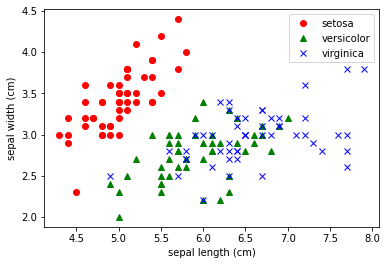

In [3]:
y = iris.target
plt.plot(X[y==0,0], X[y==0,1],"ro", label = iris.target_names[0])
plt.plot(X[y==1,0], X[y==1,1],"g^", label = iris.target_names[1])
plt.plot(X[y==2,0], X[y==2,1],"bx", label = iris.target_names[2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

### 階層的クラスタリング

[AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)を用いて階層的クラスタリングを行います。クラスタ数が3になったところで処理が止まります。類似度の基準を入れ替えて、結果を確認してみてください。

In [4]:
ac=AgglomerativeClustering(n_clusters=3, linkage='ward')
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

散布図をプロットして結果を確認します。

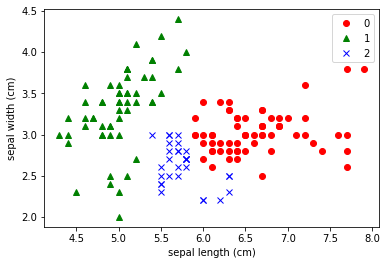

In [5]:
y = ac.labels_
plt.plot(X[y==0,0], X[y==0,1],"ro")
plt.plot(X[y==1,0], X[y==1,1],"g^")
plt.plot(X[y==2,0], X[y==2,1],"bx")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(3))

### k-meansクラスタリング

[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)を用いて分割最適化クラスタリングを行います。クラスタ数(n_clusters) は予め与えておく必要があります。一般にk-meansは初期値によって得られる結果が大きく異なりますが、scikit-learnの実装では デフォルトでk-means++法を取り入れており、初期値のクラスタ中心をできるだけ離れたデータから選ぶので、何度かやり直しても、クラス割り当て番号が異なるだけのほぼ同じ結果が得られます。

In [6]:
km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(n_clusters=3)

散布図をプロットして結果を確認します。

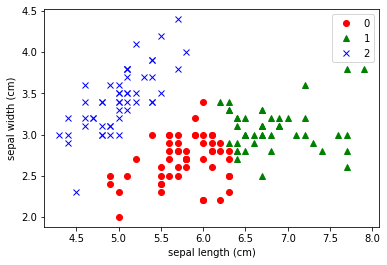

In [7]:
y = km.labels_
plt.plot(X[y==0,0], X[y==0,1],"ro")
plt.plot(X[y==1,0], X[y==1,1],"g^")
plt.plot(X[y==2,0], X[y==2,1],"bx")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(3))

## 例題11.5

### クラスタ数決定の自動化 Affinity Propagation

 [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)はすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

In [8]:


ap=AffinityPropagation(random_state=None) #random_state=Noneは警告を消すために指定
ap.fit(X)

AffinityPropagation(random_state=None)

apインスタンスのcluster_centers\_属性の値は、クラスタ中心となったデータ番号のリストです。


In [9]:
ap.cluster_centers_indices_

array([  2,  17,  33,  51,  57,  87,  94,  97, 117, 130, 141], dtype=int64)

散布図をプロットして結果を確認します。

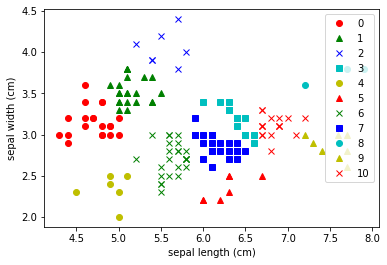

In [10]:
y = ap.labels_
co = ['rgbcy'[i%5]+'o^xs'[i%4] for i in range(20)]
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(len(ap.cluster_centers_)))

パラメータpreferenceは各データの中心としての選ばれやすさを表すので、負の値を設定すれば、その絶対値に応じてクラスタ数が少なくなります。

In [11]:
ap2 = AffinityPropagation(preference=-18, random_state=None)
ap2.fit(X)

AffinityPropagation(preference=-18, random_state=None)

In [12]:
ap2.cluster_centers_indices_

array([ 49,  71, 125], dtype=int64)

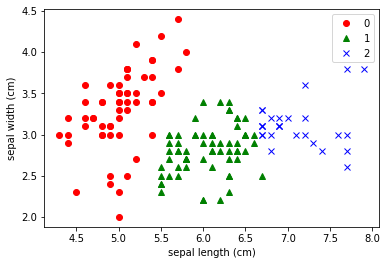

In [13]:
y = ap2.labels_
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(len(ap2.cluster_centers_)))

## 例題11.8

### 確率密度推定

[GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)では、EMアルゴリズムを用いて混合分布によるクラスタリングを行います。クラスタ数は3としておきます。

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

GaussianMixture(n_components=3)

各正規分布のパラメータは、gmmインスタンスのmeans\_属性とcovariances\_属性にリスト形式で格納されています。

In [15]:
print('means')
print(gmm.means_)
print('covariances:')
print(gmm.covariances_)

means
[[5.90637066 2.74742043]
 [5.01509042 3.45136929]
 [6.69135935 3.03010885]]
covariances:
[[[0.2771913  0.0894219 ]
  [0.0894219  0.09420707]]

 [[0.11944295 0.08835036]
  [0.08835036 0.11895089]]

 [[0.35953784 0.05092452]
  [0.05092452 0.08961421]]]


結果の表示は[サンプルコード](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py)を参考にしてください。

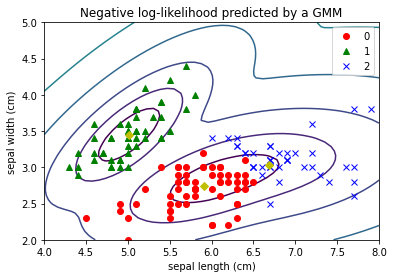

In [16]:
from matplotlib.colors import LogNorm

xa = np.linspace(4, 8)
ya = np.linspace(2, 5)
Xa, Ya = np.meshgrid(xa, ya)
XX = np.array([Xa.ravel(), Ya.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(Xa.shape)
plt.contour(Xa, Ya, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))

y = gmm.predict(X)
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(3))

plt.plot(gmm.means_[:,0], gmm.means_[:,1], 'yD')
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

異なるクラスタ数について、BICの値で評価します。結果はクラスタ数=2が一番良いモデルということになりましたが、これはデータを見ると当然の結果です。

In [24]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full')
gmm2.fit(X)
print(f"# of clusters: 2  BIC ={gmm2.bic(X):.2f}")
gmm3 = GaussianMixture(n_components=3, covariance_type='full')
gmm3.fit(X)
print(f"# of clusters: 3  BIC ={gmm3.bic(X):.2f}")
gmm4 = GaussianMixture(n_components=4, covariance_type='full')
gmm4.fit(X)
print(f"# of clusters: 4  BIC ={gmm4.bic(X):.2f}")
gmm5 = GaussianMixture(n_components=5, covariance_type='full')
gmm5.fit(X)
print(f"# of clusters: 5  BIC ={gmm5.bic(X):.2f}")


# of clusters: 2  BIC =506.95
# of clusters: 3  BIC =534.58
# of clusters: 4  BIC =546.94
# of clusters: 5  BIC =570.78


## 演習問題11.3

クラスタリング結果の評価をします。

### 正解ラベルがある場合

Adjusted rand score は正解ラベルと同じクラスタとなったデータの割合を，偶然にそのクラスタに分類される割合で補正したものです．クラスタの大きさの違いによって生じる偶然の正解を考慮した正解との一致率とみなすことができ、大きいほど良いクラスタです。

In [25]:
from sklearn.metrics import adjusted_rand_score

print(f"AgglomerativeClustering: {adjusted_rand_score(iris.target, ac.labels_):.2f}")
print(f"KMeans: {adjusted_rand_score(iris.target, km.labels_):.2f}")
print(f"AffinityPropagation: {adjusted_rand_score(iris.target, ap2.labels_):.2f}")
print(f"GaussianMixture: {adjusted_rand_score(iris.target, gmm.predict(X)):.2f}")

AgglomerativeClustering: 0.51
KMeans: 0.60
AffinityPropagation: 0.47
GaussianMixture: 0.55


### 正解ラベルがない場合

シルエット係数の平均値であるシルエットスコアで評価します。1つのデータのシルエット係数は、aを所属クラスタ内の他のデータとの距離の平均、bを自分が属するクラスタ以外の最近傍クラスタに属するデータとの距離の平均として、$(b - a)/\max(a, b)$ で計算します。シルエットスコアは-1から1までの値をとり、1に近いほど（aが0に近く、bが大きい値なので）内的結合と外的分離が両立していることになります。

In [28]:
from sklearn.metrics import silhouette_score

print(f"AgglomerativeClustering: {silhouette_score(X, ac.labels_):.2f}")
print(f"KMeans: {silhouette_score(X, km.labels_):.2f}")
print(f"AffinityPropagation: {silhouette_score(X, ap2.labels_):.2f}")
print(f"GaussianMixture: {silhouette_score(X, gmm.predict(X)):.2f}")


AgglomerativeClustering: 0.37
KMeans: 0.45
AffinityPropagation: 0.43
GaussianMixture: 0.43


## 課題1

オリジナルの4次元のirisデータに対して各種のクラスタリングを行い、結果を評価してください。

## 課題2　（余裕のある人向け）

scikit-learnのdiabetesデータに対して様々なクラスタリング手法を適用してみてください。diabetesデータは回帰用のデータ（事例数442）で、target値は 25-346 で値が高くなるほど悪化の可能性が高いことを示しています。生成したクラスタ間で、target値の平均に違いが生じているかどうかで評価を行ってください。他のクラスタと比較してtarget値の平均が突出して高くなるようなクラスタ（一定数以上の要素数をもつことが条件）を見つけることができれば成功です。この設定は、target値、すなわち病状悪化の可能性がわからない状況で、悪化する可能性が高くなるグループを見つけることのシミュレーションになっています。